In [1]:
import numpy as np      # linear algebra
import pandas as pd     # data processing
from matplotlib import pyplot as plt
import re
from string import punctuation, digits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
sms = pd.read_csv('smsturkish.csv',encoding='utf-8')
print(sms.shape)
pd.set_option('max_colwidth', 800)
sms = sms.iloc[:-1]
sms

(851, 8)


,Spam,V1,F3,F4,F5,F6,F7,F8
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """,NaN,NaN,NaN,NaN,NaN,NaN
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,NaN,NaN,NaN,NaN,NaN,NaN
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,NaN,NaN,NaN,NaN,NaN,
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM",NaN,NaN,NaN,NaN,NaN,NaN
4,Ham,nerdesin la,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin,NaN,NaN,NaN,NaN,NaN,NaN
846,Ham,Canım ya kantine gelebilir misin,NaN,NaN,NaN,NaN,NaN,NaN
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir.",NaN,NaN,NaN,NaN,NaN,NaN
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir.",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sms.drop(columns=['F3', 'F4', 'F5','F6','F7','F8'],inplace=True)
sms.rename(columns= {'Spam':'label','V1':'message'},inplace=True)
sms

,label,message
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM"
4,Ham,nerdesin la
...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin
846,Ham,Canım ya kantine gelebilir misin
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir."
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir."


In [4]:
sms.label.value_counts()

Ham     430
Spam    420
Name: label, dtype: int64

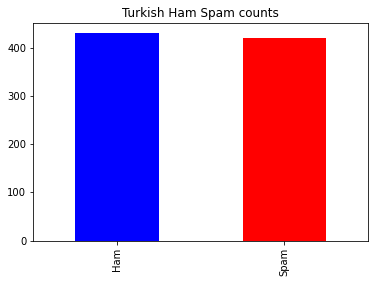

In [5]:
sms.label.value_counts().plot(kind = 'bar', color = ['blue','red'])
plt.title('Turkish Ham Spam counts')
plt.show()

In [6]:
# Transform message into lower case
sms["lowerCaseMessage"] = sms["message"].str.lower()
sms

,label,message,lowerCaseMessage
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere ""","""mudo outletlere once gelen kazaniyor_ mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,yeni turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.ihtiyaciniza gore sadece 15tlye gunluk 30dk yada 49tlye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,cadde üzerinde yeni site c blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM","gnctrkcllli, bonnyfood'dan lezzetli cicekler firsati. tum urunlerde gecerli 25 .tllik hediye ceki 1 tl! bonny yaz 8073'e gonder. sms ucreti 50krs. gncteklif.com"
4,Ham,nerdesin la,nerdesin la
...,...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin,kamu 1000 paketine gecerek ayda sadece 45tlye heryonle 1000dk ve 1000smse sahip olabilirsiniz.bu muhtesem paket icin hemen kamu yazip 2222ye gonderin
846,Ham,Canım ya kantine gelebilir misin,canım ya kantine gelebilir misin
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir.","**5992 nolu kredi karti ekstre borcunuz 1,119.25 tl asgari odeme tutari 247.00 tl ve son odeme tarihi 05.07.2011 dir."
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir.","18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 tl 'ye ulasmistir. kullanilabilir limitiniz 1423.03 tl 'dir."


In [7]:
# Remove http, www, .com, email adress, link, punctuation and digit

def preProcessing(text):
    return removePunc(removeDigits(removeEmail(remove_com_tr(removeLink(text)))))

def removeLink(text):
    return re.sub(r"((http\S+)|(www\S+))", "", str(text))

def remove_com_tr(text):
    text = re.sub(r'\S*\.(com|tr)',"",str(text))
    return text

def removeEmail(text):
    return re.sub(r'([.\w]{3,}@[.\w]{5,})', '', str(text))

def removeDigits(text):
    text = text.strip()  #removing whitespaces from text
    remove_digits = str.maketrans('', '', digits)
    return text.translate(remove_digits)

def removePunc(text):
    regex = re.compile('[%s]' % re.escape(punctuation))
    return regex.sub('', text)

In [8]:
sms["cleanedMessage"] = sms['lowerCaseMessage'].map(preProcessing)
sms

,label,message,lowerCaseMessage,cleanedMessage
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere ""","""mudo outletlere once gelen kazaniyor_ mobilya basta olmak uzere """,mudo outletlere once gelen kazaniyor mobilya basta olmak uzere
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,yeni turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.ihtiyaciniza gore sadece 15tlye gunluk 30dk yada 49tlye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,yeni turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsinizihtiyaciniza gore sadece tlye gunluk dk yada tlye ay boyunca dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,cadde üzerinde yeni site c blok no 3 zilde gokcer ozan tuna yaziyo,cadde üzerinde yeni site c blok no zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM","gnctrkcllli, bonnyfood'dan lezzetli cicekler firsati. tum urunlerde gecerli 25 .tllik hediye ceki 1 tl! bonny yaz 8073'e gonder. sms ucreti 50krs. gncteklif.com",gnctrkcllli bonnyfooddan lezzetli cicekler firsati tum urunlerde gecerli tllik hediye ceki tl bonny yaz e gonder sms ucreti krs
4,Ham,nerdesin la,nerdesin la,nerdesin la
...,...,...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin,kamu 1000 paketine gecerek ayda sadece 45tlye heryonle 1000dk ve 1000smse sahip olabilirsiniz.bu muhtesem paket icin hemen kamu yazip 2222ye gonderin,kamu paketine gecerek ayda sadece tlye heryonle dk ve smse sahip olabilirsinizbu muhtesem paket icin hemen kamu yazip ye gonderin
846,Ham,Canım ya kantine gelebilir misin,canım ya kantine gelebilir misin,canım ya kantine gelebilir misin
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir.","**5992 nolu kredi karti ekstre borcunuz 1,119.25 tl asgari odeme tutari 247.00 tl ve son odeme tarihi 05.07.2011 dir.",nolu kredi karti ekstre borcunuz tl asgari odeme tutari tl ve son odeme tarihi dir
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir.","18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 tl 'ye ulasmistir. kullanilabilir limitiniz 1423.03 tl 'dir.",de kesilecek son hanesi olan kartiniza ait ekstrenize yansiyacak tutar tl ye ulasmistir kullanilabilir limitiniz tl dir


In [9]:
#Create Train Test Split
X = sms["cleanedMessage"]

y = sms['label'].map( {'Spam': 1, 'Ham': 0} )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [10]:
# K-Neighbors Classifier
kneighbors = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
kneighbors.fit(X_train, y_train)

print("Training Accuracy:", kneighbors.score(X_train, y_train))

predict_knn = kneighbors.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision score: ', precision_score(y_test, predict_knn, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_knn, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_knn, average='weighted'))

Training Accuracy: 0.9720588235294118

Testing Accuracy: 0.7352941176470589
Precision score:  0.7385037348272642
Recall score:     0.7352941176470589
F1 score:         0.7337709626134674


In [11]:
#cross validation for KNN
fbeta_scorer = make_scorer(fbeta_score, beta = 0.5)

def validation_score(model_name):
    scores = cross_val_score(model_name, X_train, y_train, cv=10, scoring=fbeta_scorer) 
    return scores

kneighbors_val_score = validation_score(kneighbors)
print(kneighbors_val_score, "\n")
print("Average cross-validation F-beta score:", kneighbors_val_score.mean())

[0.70512821 0.8490566  0.68681319 0.68527919 0.65989848 0.75144509
 0.69364162 0.68292683 0.63451777 0.63291139] 

Average cross-validation F-beta score: 0.6981618354062726


In [12]:
# Random Forest
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

print("Training Accuracy:", randFor.score(X_train, y_train))

predict_rf = randFor.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_rf))
print('Precision score: ', precision_score(y_test, predict_rf, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_rf, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_rf, average='weighted'))

Training Accuracy: 0.9985294117647059

Testing Accuracy: 0.9470588235294117
Precision score:  0.9476597615790501
Recall score:     0.9470588235294117
F1 score:         0.9470643193434335


In [63]:
#cross validation for Random Forest
randFor_val_score = validation_score(randFor)
print(randFor_val_score, "\n")
print("Average cross-validation F-beta score:", randFor_val_score.mean())

[0.98765432 0.96385542 0.9939759  0.98726115 0.96273292 0.98039216
 0.94771242 0.96273292 0.96969697 0.92356688] 

Average cross-validation F-beta score: 0.967958105513625


In [64]:
# Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

print("Training Accuracy:", logReg.score(X_train, y_train))

predict_lg = logReg.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_lg))
print('Precision score: ', precision_score(y_test, predict_lg, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_lg, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_lg, average='weighted'))

Training Accuracy: 0.9911764705882353

Testing Accuracy: 0.9411764705882353
Precision score:  0.942219180983569
Recall score:     0.9411764705882353
F1 score:         0.9411764705882353


In [65]:
#cross validation for Logistic Regression
logReg_val_score = validation_score(logReg)
print(logReg_val_score, "\n")
print("Average cross-validation F-beta score:", logReg_val_score.mean())

[0.98765432 0.94936709 1.         0.98726115 0.98726115 0.98039216
 0.93959732 0.97315436 0.96969697 0.94771242] 

Average cross-validation F-beta score: 0.9722096925301595


In [66]:
#fitting a Multinomial Naive Bayes Classifier Model 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

print("Training Accuracy:", naive_bayes.score(X_train, y_train))

predict_nb = naive_bayes.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_nb))
print('Precision score: ', precision_score(y_test, predict_nb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_nb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_nb, average='weighted'))

Training Accuracy: 0.9955882352941177

Testing Accuracy: 0.9411764705882353
Precision score:  0.9472407519708915
Recall score:     0.9411764705882353
F1 score:         0.940889566528953


In [67]:
#cross validation for Naive Bayes
naive_bayes_val_score = validation_score(naive_bayes)
print(naive_bayes_val_score, "\n")
print("Average cross-validation F-beta score:", naive_bayes_val_score.mean())

[0.9939759  0.94827586 1.         0.94674556 0.97633136 0.97633136
 0.99378882 0.96969697 0.95375723 0.91715976] 

Average cross-validation F-beta score: 0.9676062828026973


In [68]:
#Support Vector Machine with linear kernel
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)

print("Training Accuracy:", svc.score(X_train, y_train))

predict_svm = svc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_svm))
print('Precision score: ', precision_score(y_test, predict_svm, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_svm, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_svm, average='weighted'))

Training Accuracy: 0.9985294117647059

Testing Accuracy: 0.9470588235294117
Precision score:  0.9476597615790501
Recall score:     0.9470588235294117
F1 score:         0.9470643193434335


In [69]:
#cross validation for Support Vector Machine
svc_val_score = validation_score(svc)
print(svc_val_score, "\n")
print("Average cross-validation F-beta score:", svc_val_score.mean())

[0.98765432 0.96385542 1.         0.98726115 0.98039216 0.98726115
 0.97315436 0.98039216 0.96273292 0.94771242] 

Average cross-validation F-beta score: 0.9770416049364942


In [70]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print("Training Accuracy:", dtc.score(X_train, y_train))

predict_dtc = dtc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_dtc))
print('Precision score: ', precision_score(y_test, predict_dtc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_dtc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_dtc, average='weighted'))

Training Accuracy: 0.8867647058823529

Testing Accuracy: 0.8647058823529412
Precision score:  0.8769107643057223
Recall score:     0.8647058823529412
F1 score:         0.8639301941979751


In [71]:
#cross validation for Decision Tree
dtc_val_score = validation_score(dtc)
print(dtc_val_score, "\n")
print("Average cross-validation F-beta score:", dtc_val_score.mean())

[0.93333333 0.86956522 0.95070423 0.93023256 0.93103448 0.93023256
 0.91503268 0.88       0.93984962 0.82644628] 

Average cross-validation F-beta score: 0.910643095990489


In [72]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)

print("Training Accuracy:", abc.score(X_train, y_train))

predict_abc = abc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_abc))
print('Precision score: ', precision_score(y_test, predict_abc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_abc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_abc, average='weighted'))

Training Accuracy: 0.9941176470588236

Testing Accuracy: 0.9470588235294117
Precision score:  0.9486810356071473
Recall score:     0.9470588235294117
F1 score:         0.9470496638393757


In [73]:
#cross validation for Ada Boost Classifier
abc_val_score = validation_score(abc)
print(abc_val_score, "\n")
print("Average cross-validation F-beta score:", abc_val_score.mean())

[0.94827586 1.         0.9939759  0.95541401 0.98726115 0.94771242
 0.93103448 0.96273292 0.89595376 0.92356688] 

Average cross-validation F-beta score: 0.9545927381439349


In [74]:
# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train, y_train)

print("Training Accuracy:", xgb.score(X_train, y_train))

predict_xgb = xgb.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_xgb))
print('Precision score: ', precision_score(y_test, predict_xgb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_xgb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_xgb, average='weighted'))

Training Accuracy: 0.9691176470588235

Testing Accuracy: 0.9235294117647059
Precision score:  0.9265604575163399
Recall score:     0.9235294117647059
F1 score:         0.923473827591332


In [75]:
#cross validation for XGBoost Classifier
xgb_val_score = validation_score(xgb)
print(xgb_val_score, "\n")
print("Average cross-validation F-beta score:", xgb_val_score.mean())

[0.96385542 0.91772152 1.         0.97315436 0.96273292 0.96551724
 0.94771242 0.92356688 0.92356688 0.90604027] 

Average cross-validation F-beta score: 0.9483867908442978


In [76]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print("Training Accuracy:", sgd.score(X_train, y_train))

predict_sgd = sgd.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_sgd))
print('Precision score: ', precision_score(y_test, predict_sgd, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_sgd, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_sgd, average='weighted'))

Training Accuracy: 0.9985294117647059

Testing Accuracy: 0.9764705882352941
Precision score:  0.9767219080724256
Recall score:     0.9764705882352941
F1 score:         0.9764608060519108


In [77]:
#cross validation for Stochastic Gradient Descent
sgd_val_score = validation_score(sgd)
print(sgd_val_score, "\n")
print("Average cross-validation F-beta score:", sgd_val_score.mean())

[0.92696629 0.94827586 1.         0.98039216 0.96969697 0.97633136
 0.98726115 0.96273292 0.95375723 0.93939394] 

Average cross-validation F-beta score: 0.9644807872289196


In [10]:
#for fitting the model
X_train = X_train.toarray()
X_test = X_test.toarray()

In [94]:
#Initialising ANN
ann = Sequential()
 #Adding First Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
22/22 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.5574 - val_loss: 0.6828 - val_accuracy: 0.7235
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.8985 - val_loss: 0.6442 - val_accuracy: 0.9118
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.9706 - val_loss: 0.5679 - val_accuracy: 0.9412
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.9824 - val_loss: 0.4690 - val_accuracy: 0.9647
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.9882 - val_loss: 0.3684 - val_accuracy: 0.9706
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.9882 - val_loss: 0.2868 - val_accuracy: 0.9765
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9912 - val_loss: 0.2286 - val_accuracy: 0.9765
Epoch 8/50
22/22 [==

In [95]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9985
Training Loss: 0.0045
Testing Accuracy:  0.9941
Testing Loss:  0.0432


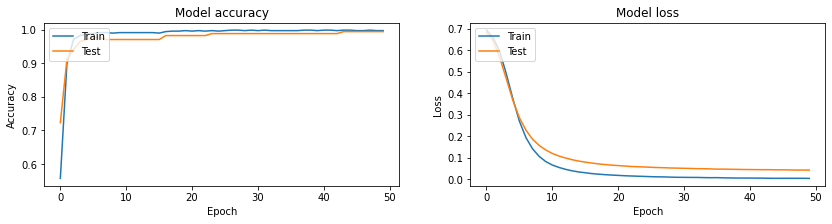

In [96]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [82]:
# create the CNN model
cnn = Sequential()
cnn.add(Embedding(1000, 64, input_length=3044))
cnn.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3044, 300)         300000    
                                                                 
 conv1d (Conv1D)             (None, 3044, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1522, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1522, 64)          32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 761, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 761, 32)          

In [83]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 11s 627ms/step - loss: 0.6964 - accuracy: 0.4596 - val_loss: 0.6889 - val_accuracy: 0.5074
Epoch 2/50
17/17 [==============================] - 11s 642ms/step - loss: 0.5980 - accuracy: 0.7463 - val_loss: 0.3800 - val_accuracy: 0.8456
Epoch 3/50
17/17 [==============================] - 10s 614ms/step - loss: 0.1721 - accuracy: 0.9412 - val_loss: 0.1529 - val_accuracy: 0.9632
Epoch 4/50
17/17 [==============================] - 11s 644ms/step - loss: 0.0482 - accuracy: 0.9871 - val_loss: 0.1773 - val_accuracy: 0.9485
Epoch 5/50
17/17 [==============================] - 11s 642ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.2651 - val_accuracy: 0.9485
Epoch 6/50
17/17 [==============================] - 11s 633ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3645 - val_accuracy: 0.9412
Epoch 7/50
17/17 [==============================] - 11s 644ms/step - loss: 8.1249e-04 - accuracy: 1.0000 - val_loss: 0.3759 - val_accuracy: 0.

In [89]:
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9868
Training Loss: 0.1381
Testing Accuracy:  0.9529
Testing Loss:  0.3142


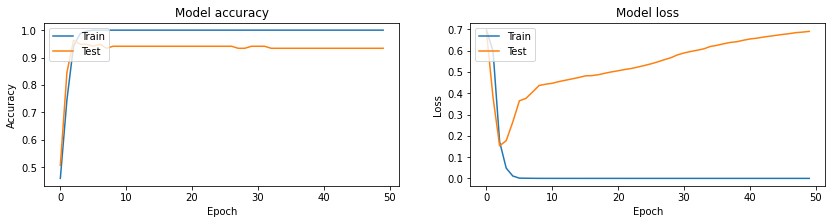

In [90]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [13]:
# Create the LSTM Model
lstm = Sequential()
lstm.add(Embedding(input_dim=1000, output_dim=64, input_length=3044))
lstm.add(LSTM(100))
lstm.add(Dense(1, activation="sigmoid"))
lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3044, 64)          64000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fit the model
history = lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17/17 [==============================] - 27s 2s/step - loss: 0.6933 - accuracy: 0.5147 - val_loss: 0.6942 - val_accuracy: 0.4926
Epoch 2/50
17/17 [==============================] - 31s 2s/step - loss: 0.6932 - accuracy: 0.5147 - val_loss: 0.6937 - val_accuracy: 0.4926
Epoch 3/50
17/17 [==============================] - 33s 2s/step - loss: 0.6936 - accuracy: 0.5147 - val_loss: 0.6939 - val_accuracy: 0.4926
Epoch 4/50
17/17 [==============================] - 33s 2s/step - loss: 0.6926 - accuracy: 0.5147 - val_loss: 0.6935 - val_accuracy: 0.4926
Epoch 5/50
17/17 [==============================] - 34s 2s/step - loss: 0.6927 - accuracy: 0.5147 - val_loss: 0.6938 - val_accuracy: 0.4926
Epoch 6/50
17/17 [==============================] - 35s 2s/step - loss: 0.6925 - accuracy: 0.5147 - val_loss: 0.6933 - val_accuracy: 0.4926
Epoch 7/50
17/17 [==============================] - 35s 2s/step - loss: 0.6931 - accuracy: 0.5147 - val_loss: 0.6931 - val_accuracy: 0.4926
Epoch 8/50
17/17 [==

In [15]:
loss, accuracy = lstm.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = lstm.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.5824
Training Loss: 0.6342
Testing Accuracy:  0.5471
Testing Loss:  0.6821


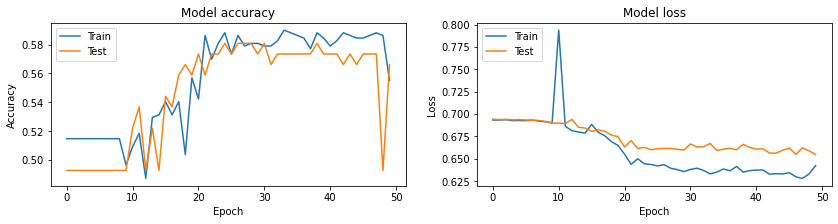

In [16]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()